<a href="https://colab.research.google.com/github/Jonah-30/Item-identifier-Cifar10-Neural-Network/blob/main/neuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries and datasets.

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

df = tf.keras.datasets.cifar10

# seperate dataset into inputs and outputs and training and testing
(x_train, y_train), (x_test, y_test) = df.load_data()

# normalize images by scaling the pixels from 0 to 1
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

# the names of each classification
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

170500096/170498071 [==============================] - 2s 0us/step


Display sample images.

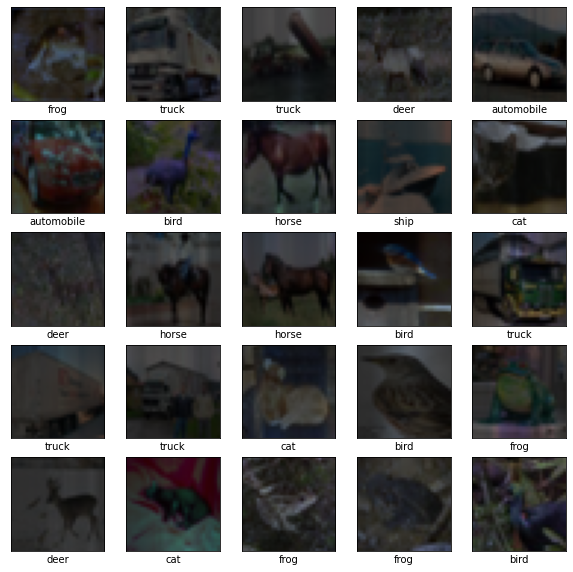

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

Building the neural network.

In [ ]:
model = tf.keras.models.Sequential()


# add convolution layers
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))

# add input layer and one dense layer
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))

# add output layer
model.add(tf.keras.layers.Dense(10))
model.summary()

# setup the back-propagation
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

Training the neural network.

In [ ]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_train, y_train))

Epoch 1/10
1563/1563 [==============================] - 87s 55ms/step - loss: 1.9456 - accuracy: 0.2782 - val_loss: 1.4193 - val_accuracy: 0.4919
Epoch 2/10
1563/1563 [==============================] - 83s 53ms/step - loss: 1.3906 - accuracy: 0.5057 - val_loss: 1.2785 - val_accuracy: 0.5458
Epoch 3/10
1563/1563 [==============================] - 83s 53ms/step - loss: 1.2239 - accuracy: 0.5668 - val_loss: 1.1285 - val_accuracy: 0.6041
Epoch 4/10
1563/1563 [==============================] - 82s 52ms/step - loss: 1.0986 - accuracy: 0.6149 - val_loss: 1.0825 - val_accuracy: 0.6192
Epoch 5/10
1563/1563 [==============================] - 79s 51ms/step - loss: 1.0133 - accuracy: 0.6460 - val_loss: 0.9167 - val_accuracy: 0.6793
Epoch 6/10
1563/1563 [==============================] - 82s 53ms/step - loss: 0.9458 - accuracy: 0.6703 - val_loss: 0.8989 - val_accuracy: 0.6820
Epoch 7/10
1563/1563 [==============================] - 83s 53ms/step - loss: 0.9040 - accuracy: 0.6835 - val_loss: 0.8361 -

Evaluate the loss and accuracy of the testing dataset

313/313 - 4s - loss: 0.9337 - accuracy: 0.6832
0.933742880821228 0.6832000017166138


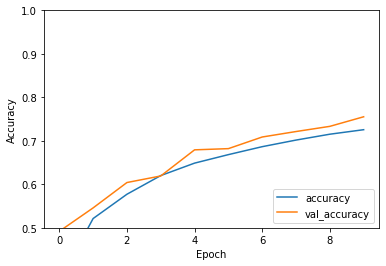

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

print(test_loss, test_acc)

Save the model.

In [ ]:
model.save('image_classifier_net.model')
new_model = tf.keras.models.load_model('image_classifier_net.model')

INFO:tensorflow:Assets written to: image_classifier_net.model/assets


Plot the results on test set.

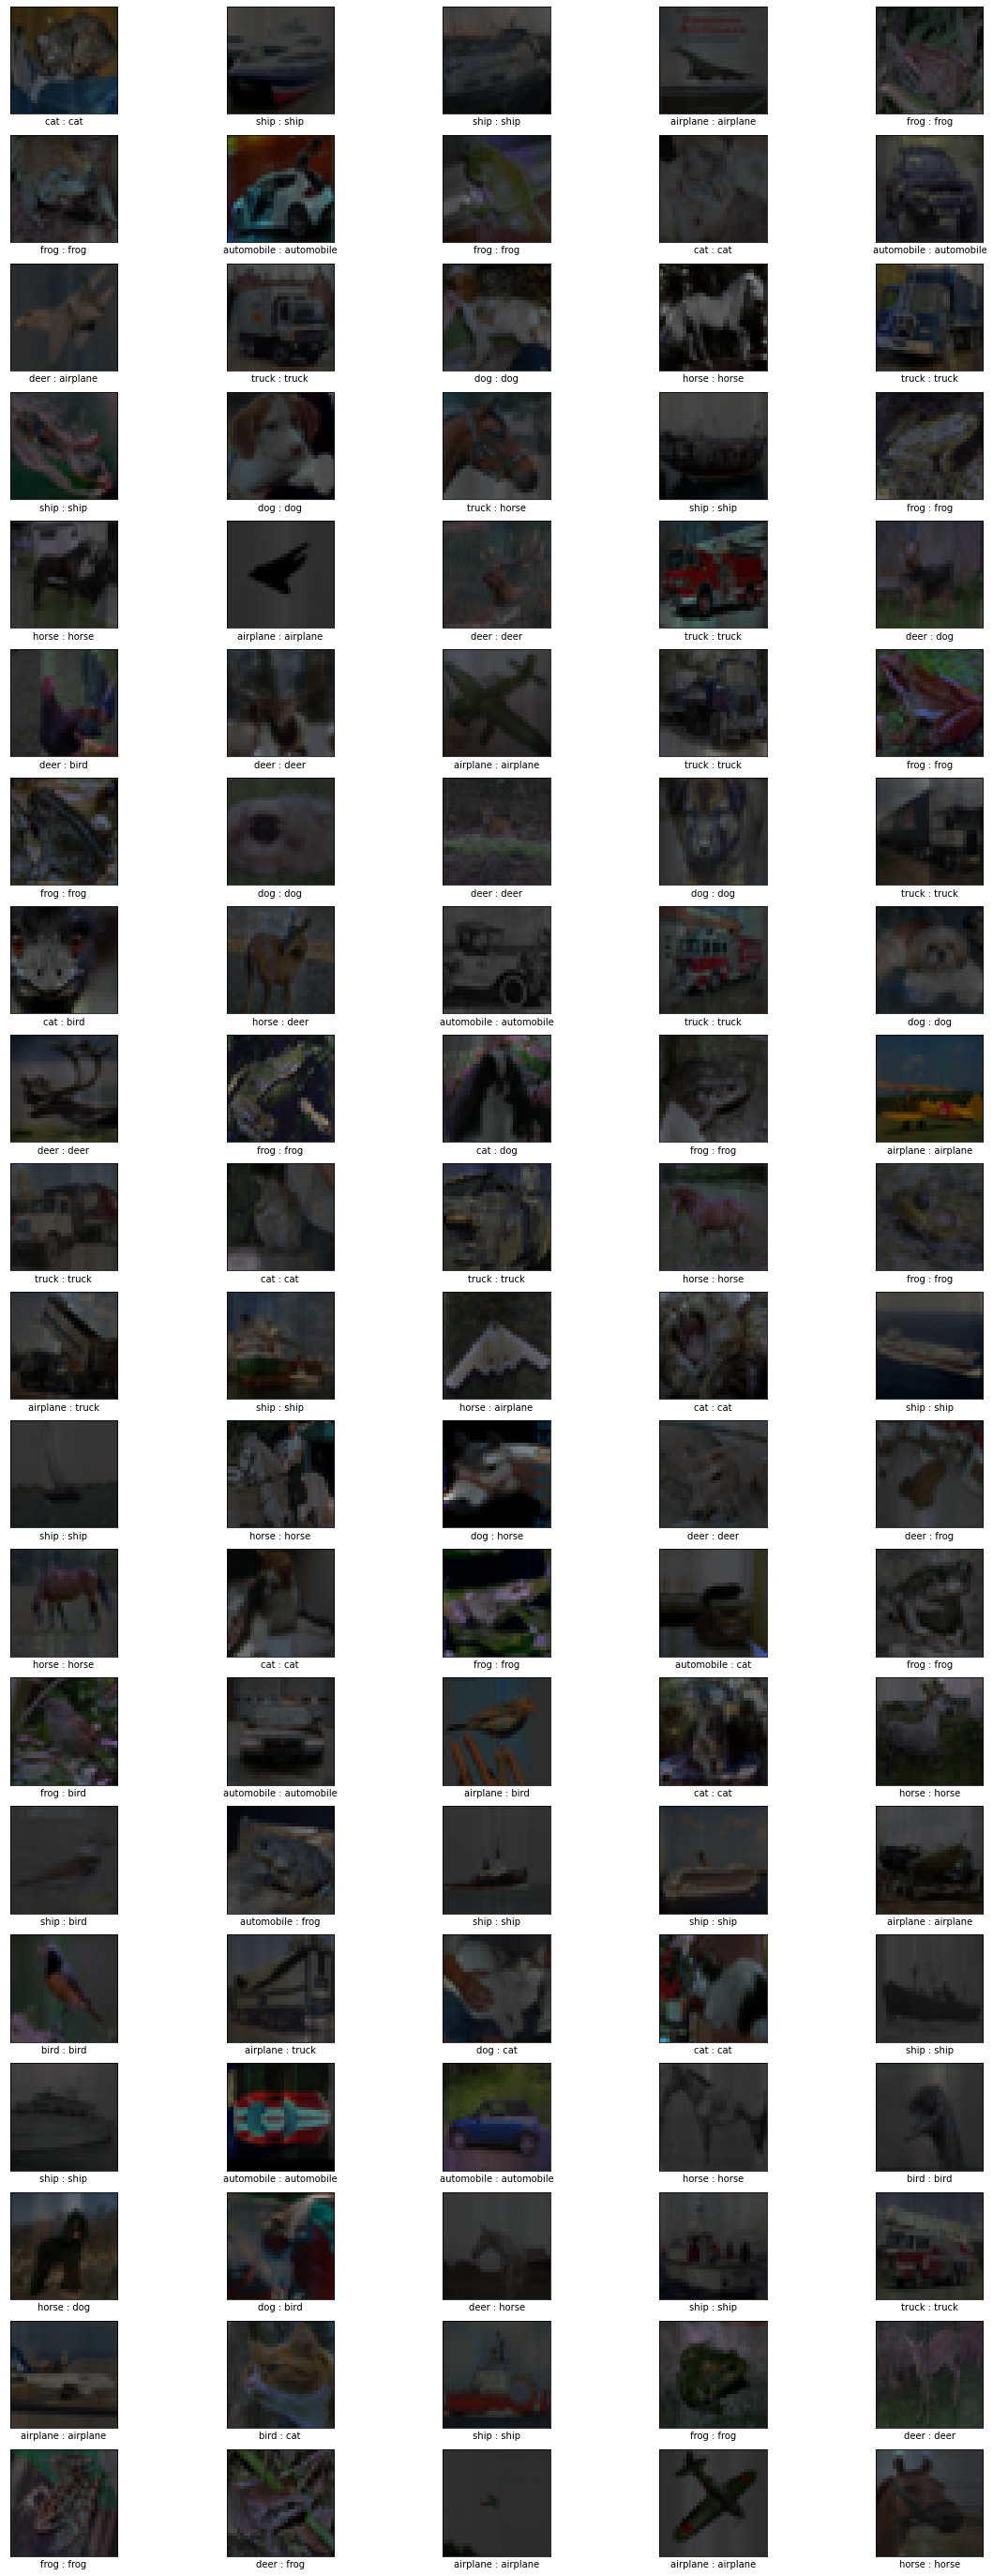

In [ ]:
predictions=new_model.predict([x_test])
plt.figure(figsize=(20,50))
for i in range(100):
    plt.subplot(20,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[np.argmax(predictions[i])] + ' : '+ class_names[y_test[i][0]])
plt.show()